In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-05 05:36:46--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-05 05:36:46 (29.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
data = pd.read_csv('moore.csv',header=None).values
X=data[:,0].reshape(-1,1) # make a 2D array of size N x D , D=1
Y=data[:,1] 
print(data)

[[       1971        2300]
 [       1972        3500]
 [       1973        2500]
 [       1973        2500]
 [       1974        4100]
 [       1974        4500]
 [       1974        8000]
 [       1975        3510]
 [       1976        5000]
 [       1976        8500]
 [       1976        6500]
 [       1978        9000]
 [       1978       29000]
 [       1979       17500]
 [       1979       29000]
 [       1979       68000]
 [       1981       11500]
 [       1982       55000]
 [       1982      134000]
 [       1983       22000]
 [       1984       63000]
 [       1984      190000]
 [       1985      275000]
 [       1985       25000]
 [       1985       16000]
 [       1986      110000]
 [       1986      375000]
 [       1986       30000]
 [       1987      385000]
 [       1987      730000]
 [       1987      273000]
 [       1987      553000]
 [       1988      180000]
 [       1988      250000]
 [       1989      600000]
 [       1989     1000000]
 [       1989     1180235]
 

In [ ]:
plt.scatter(X,Y)

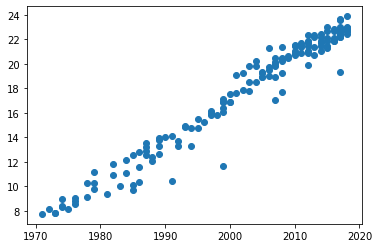

In [7]:
Y=np.log(Y)
plt.scatter(X,Y)

In [ ]:
X=X-X.mean()
print(X)

In [9]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(1,)),
      tf.keras.layers.Dense(1)                           
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

def schedule(epoch,lr):
  if(epoch>=50):
    return 0.0001
  return 0.001 

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r= model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 3ms/step - loss: 352.7188 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 332.2599 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 358.3704 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 320.9333 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 221.2705 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 199.1764 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 132.6758 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 131.2128 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 74.3292 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 41.4446 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss:

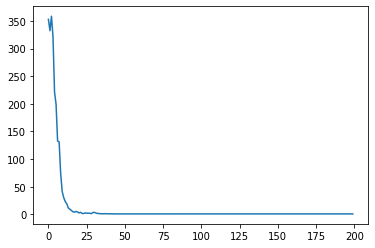

In [10]:
plt.plot(r.history['loss'],label='loss')

In [11]:
print(model.layers)

In [12]:
print(model.layers[0].get_weights())

[array([[0.34412992]], dtype=float32), array([17.76039], dtype=float32)]


In [13]:
a=model.layers[0].get_weights()[0][0,0]
print(a)

print("the growth rate:", np.log(2) / a)

0.34412992
the growth rate: 2.0142020215744862


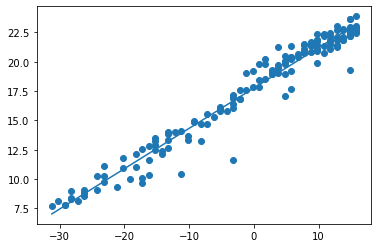

In [14]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [15]:
w,b=model.layers[0].get_weights()
X=X.reshape(-1,1)
Yhat2 = (X.dot(w) +b).flatten()
np.allclose(Yhat,Yhat2)

True